# Step: 1 Load the Dataset
## Dataset Link:

https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ulugbekshernazarov","key":"04a6f70b9e9b10a3c9cfb00e5ddb14c2"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sujithmandala/simple-loan-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/1.05k [00:00<?, ?B/s]
100% 1.05k/1.05k [00:00<00:00, 2.34MB/s]


In [3]:
!unzip simple-loan-classification-dataset.zip

Archive:  simple-loan-classification-dataset.zip
  inflating: loan.csv                


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('loan.csv')
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


# Step 2: Perform a simple EDA - 10 points

### Remember to check for class imabalance in target or null values

In [14]:
df.shape

(61, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [6]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [8]:
df.isna().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In [13]:
df.loan_status.describe()

,loan_status
count,61
unique,2
top,Approved
freq,45


In [20]:
for cat in df.select_dtypes(include='object'):
  print(df[cat].unique(), len(df[cat].unique()))

['Male' 'Female'] 2
['Engineer' 'Teacher' 'Student' 'Manager' 'Accountant' 'Nurse' 'Lawyer'
 'Artist' 'IT' 'Doctor' 'Consultant' 'Analyst' 'Salesman' 'Marketing'
 'Architect' 'Designer' 'Pharmacist' 'Researcher' 'Professor' 'Pilot'
 'Receptionist' 'Banker' 'Writer' 'Chef' 'Veterinarian' 'Sales' 'HR'
 'Electrician' 'Realtor' 'Photographer' 'Editor' 'Programmer' 'Dentist'
 'Musician' 'Psychologist' 'Server' 'Software' 'Stylist'] 38
["Bachelor's" "Master's" 'High School' "Associate's" 'Doctoral'] 5
['Married' 'Single'] 2
['Approved' 'Denied'] 2


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in df.select_dtypes(include='object'):
  df[cat] = le.fit_transform(df[cat])

In [22]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


## Step 3: Here as the classes are imabalanced we go for wither upsampling, downsampling or SMOTE - 20 points

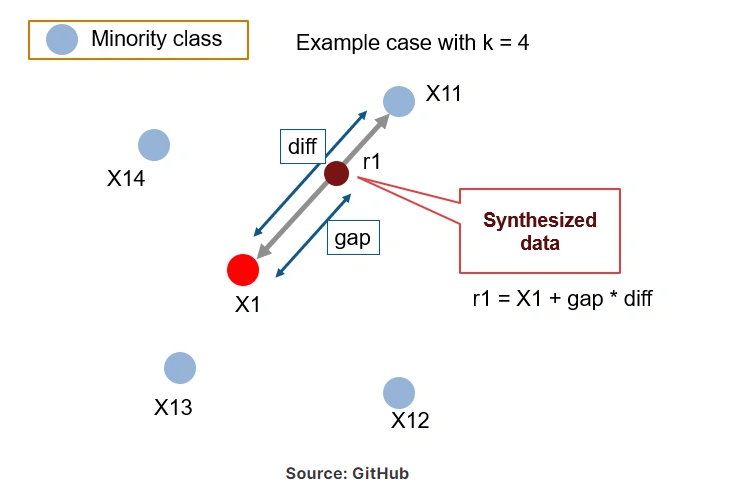

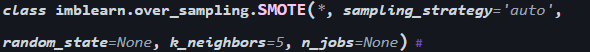

In [26]:
from imblearn.over_sampling import SMOTE

X = df.drop('loan_status', axis=1)
y = df['loan_status']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [29]:
X_resampled.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,1,12,1,0,85000,720
1,45,0,35,4,1,62000,680
2,28,1,33,3,1,25000,590
3,51,0,16,1,0,105000,780
4,36,1,0,1,0,75000,710


In [28]:
y_resampled.value_counts()

,count
loan_status,
0,45
1,45


# Step 4: Split into test and train - 5 points

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Perform Scaling and Label Encoding - 5 points

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for cat in ['age', 'income', 'credit_score']:
    X_train[cat] = scaler.fit_transform(X_train[[cat]])
    X_test[cat] = scaler.transform(X_test[[cat]])
X_train.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
49,-0.860987,0,3,1,1,-0.857684,-0.947947
62,-0.347604,0,22,0,1,-0.694675,-0.685135
73,-1.117679,0,26,2,1,-0.855331,-1.210759
69,-0.860987,0,32,3,1,-1.152787,-1.092493
76,-0.860987,0,15,0,1,-0.755941,-0.947947


# Step 6: Grid Search (Remember to use the correct Technique) - 5 points

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a dictionary of models and their corresponding hyperparameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'l1_ratio': [0, 0.5, 1]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='accuracy', verbose=2)

# Step 7: Perform Evaluation - 10 points

---



In [38]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         6

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Analyse - 5 points

The model's performance is flawless on this dataset, achieving 100% accuracy across all metrics for both classes.

Both precision and recall scores are perfect, indicating that the model did not make any mistakes in its predictions.

Model seems like overfitting.

## What is SMOTE (Synthetic Minority Oversampling Technique)



*   SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
*   This algorithm helps to overcome the overfitting problem posed by random oversampling.
*   It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:

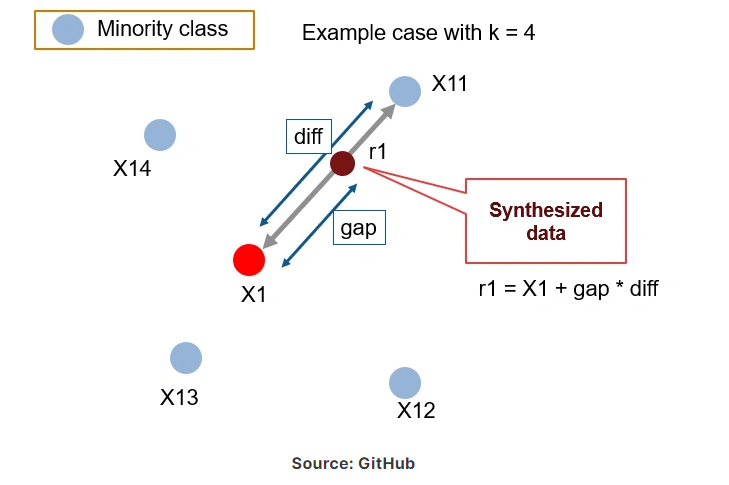

Though this algorithm is quite useful, it has few drawbacks associated with it.

* The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.
* SMOTE tends to create a large no. of noisy data points in feature space.


### ADASYN: Adaptive Synthetic Sampling Approach

* Generalized form of the SMOTE algorithm
* This algorithm also aims to oversample the minority class by generating synthetic instances for it.
* But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn.
* Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.



### Hybridization: SMOTE + Tomek Links

* Hybridization techniques involve combining both undersampling and oversampling techniques.

* This is done to optimize the performance of classifier models for the samples created as part of these techniques.

* SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links.

### Hybridization: SMOTE + ENN
* SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

* Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.


##### Extra Reading
* Learning from Imbalanced Data Sets by Alberto Fernández, Salvador García, Mikel Galar, Ronaldo C. Prati, Bartosz Krawczyk, Francisco Herrera

# Homework (Perform oversampling and undersampling and analyze the differences between SMOTE/ Oversampling and Undersampling) - 30+20 points


In [47]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Let's make our own dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set class distribution:", Counter(y_train))
print("Test set:", Counter(y_test))

Training set class distribution: Counter({0: 722, 1: 78})
Test set: Counter({0: 175, 1: 25})


In [42]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

print("After oversampling:", Counter(y_train_over))

After oversampling: Counter({1: 722, 0: 722})


In [43]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("After undersampling:", Counter(y_train_under))

After undersampling: Counter({0: 78, 1: 78})


In [45]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_smote))

After SMOTE: Counter({1: 722, 0: 722})


In [49]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print("After ADASYN:", Counter(y_train_adasyn))

After ADASYN: Counter({0: 722, 1: 711})


In [48]:
from imblearn.under_sampling import TomekLinks

smote_tomek = SMOTETomek(random_state=42)

X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

print("After SMOTE + Tomek Links:", Counter(y_train_smote_tomek))

After SMOTE + Tomek Links: Counter({1: 720, 0: 720})


In [50]:
from imblearn.under_sampling import EditedNearestNeighbours

smote_enn = SMOTEENN(random_state=42)

X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

print("After SMOTE + ENN:", Counter(y_train_smote_enn))

After SMOTE + ENN: Counter({1: 706, 0: 612})


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000, random_state=42)

def evaluate_model(X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Results with Original Data:")
evaluate_model(X_train, y_train, X_test, y_test)

print("\nResults with Oversampling:")
evaluate_model(X_train_over, y_train_over, X_test, y_test)

print("\nResults with Undersampling:")
evaluate_model(X_train_under, y_train_under, X_test, y_test)

print("\nResults with SMOTE:")
evaluate_model(X_train_smote, y_train_smote, X_test, y_test)

print("\nResults with ADASYN:")
evaluate_model(X_train_adasyn, y_train_adasyn, X_test, y_test)

print("\nResults with SMOTE + Tomek Links:")
evaluate_model(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test)

print("\nResults with SMOTE + ENN:")
evaluate_model(X_train_smote_enn, y_train_smote_enn, X_test, y_test)

Results with Original Data:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       175
           1       0.67      0.48      0.56        25

    accuracy                           0.91       200
   macro avg       0.80      0.72      0.75       200
weighted avg       0.90      0.91      0.90       200


Results with Oversampling:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       175
           1       0.46      0.88      0.60        25

    accuracy                           0.85       200
   macro avg       0.72      0.87      0.76       200
weighted avg       0.92      0.85      0.87       200


Results with Undersampling:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92       175
           1       0.47      0.84      0.60        25

    accuracy                           0.86       200
   macro avg       0.72      0.85      0.76

1. Use Oversampling when the dataset is small, and overfitting is not a major concern.
2. Use Undersampling when the dataset is large, but training time and efficiency are priorities, and you want to reduce overfitting risk.
3. Use SMOTE when you want to generate new examples to train a more generalized model and avoid the pitfalls of simple replication.
4. ADASYN: Useful when you need more adaptive oversampling focusing on difficult instances. May introduce noise.
5. SMOTE + Tomek Links: Effective in cleaning up overlapping data points and providing a cleaner decision surface, leading to less overfitting.
6. SMOTE + ENN: Aggressively removes noisy and overlapping samples, leading to a very clear decision boundary, but can be overly aggressive, removing informative samples.